**Abstract**:

Here I investigate how Salt Lake City's air quality has changed over time by downloading 38 years of data from the EPA, segmenting it into various dataframes with pandas, then exploring them visually with matplotlib. After identifying the two primary pollutants causing poor air quality, I discuss how we might be able to reduce them. The Jupyter Notebook used to write this post can be found on my github [here](https://github.com/Patrick-DeBiasse/SLC-Air-Quality/).

**Background**:

As a child, I remember watching my dad clean the fish tank. This was a monthly ritual, as over that length of time it would go from clear to cloudy to “we should not be pet owners” dirty. I always felt bad for the fish in the days preceding this cleaning – when they were clearly bopping around in some nasty stuff:
 
<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/dirty_tank_compressed_3.jpg" alt="dirty fish tank">

</center>

<p style="text-align: center; font-style: italic;"> Not the fish tank of my childhood, but similar. </p>

Household fish aren’t the only ones subjected to such conditions. Many of us share their situation by living in areas with dirty air. Here’s a map of PM2.5 pollution (tiny particles that cause a host of health problems) across the U.S.: 
 
<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/US_air_3.jpg" alt="U.S. map of PM2.5 air pollution">

</center>

<p style="text-align: center; font-style: italic;"> PM2.5 pollution across the U.S. </p>

The blotch of red towards the middle-left of the country is Salt Lake City, where due to the perimeter of mountains surrounding the inhabited valley floor (forming a bowl-like geometry), pollutants get trapped and accumulate. This is especially bad in the winter, when a blanket of warm air forms a “lid” on top of the bowl – this effect is known as the *winter inversion*.  

I had heard about this spooky effect prior to moving to SLC, but so far this winter air quality hasn't seemed to be an issue. Is this inversion business just media hype? Is polluted air in Salt Lake a thing of the past? I was curious to see what the air quality in SLC is today and how it has changed over time. 

Poking around, I came across an article in the Deseret News titled “Visualizing SLC air pollution in 35 years and what it tells us.” The [article]( https://www.deseret.com/2015/5/7/20564270/visualizing-slc-air-pollution-in-35-years-and-what-it-tells-us) links to a visualization, but the link is broken. I sent the author a note to let her know, and in the meantime decided to see if I could pull air quality data and visualize it myself. 

Fortunately, the EPA makes air quality data available to the public via their AirData Quality Monitors [web app](https://epa.maps.arcgis.com/apps/webappviewer/index.html?id=5f239fd3e72f424f98ef3d5def547eb5&extent=-146.2334,13.1913,-46.3896,56.5319). Below are all the monitors across the U.S. for the five primary pollutants used in evaluating air quality (carbon monoxide, nitrogen dioxide, ozone, PM2.5, and sulfur dioxide): 
 
<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/US_monitors_reduced.png" alt="EPA air quality monitors in the U.S.">

</center>

<p style="text-align: center; font-style: italic;"> Air quality monitors in the U.S. </p>

Zooming in on SLC, we can see the valley has 5 active monitors: 
 
<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/valley_monitors_reduced.png" alt="Air quality monitors in Salt Lake City">

</center>

<p style="text-align: center; font-style: italic;"> Air quality monitors in Salt Lake City. </p>

The EPA takes the pollutant concentration data from these monitors (some measured in parts per million, some in parts per billion, others microgram per cubic meter), and translates them into a more intuitive measurement called the Air Quality Index, or AQI. The AQI is calculated for each of the primary pollutants individually, with the  highest AQI of the bunch being the number that gets reported. The table below gives an idea of how each pollutant's concentration is converted into AQI: 

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/AQI_calculation_table_reduced.png" alt="AQI table per primary pollutant">

</center>

<p style="text-align: center; font-style: italic;"> Detail on how AQI is calculated per pollutant. </p>

Looking at the right side of the table, you can see AQI ranges from 0 to 500, with higher numbers signifying worse air quality. 0 to 50 is "Good" air quality (green), 51 to 100 is "Moderate" air quality (yellow), and so on.   

Before getting into the data, one final summary: 
 - The EPA uses standard formulas to turn non-intuitive pollutant concentration data into the more intuitive Air Quality Index (AQI)
 - AQI ranges from 0 to 500, with lower numbers signifying better air quality
 - The AQI reported on a given day is the highest AQI among the five primary pollutants (ozone, PM2.5 (particle pollution), carbon monoxide, sulfur dioxide, and nitrogen dioxide)
  - If two or more pollutants have AQI values above 100 on a given day, the highest AQI will be announced, with warnings for both pollutants included in the accompanying message. 
  - In large cities (more than 350,000 people), state and local agencies are required to report the AQI to the public daily

**Analysis**:

The EPA has made daily AQI data across the U.S. available from 1980 to today. 2019's data isn't complete just yet, so I pulled data for 1980 to 2018.

In [1]:
#loading packages
import pandas as pd
import requests
import zipfile
import glob
import io

#pulling annual AQI data by county for 1980 to 2018, unzipping and placing the csv files in a folder on my desktop
for i in range(1980, 2019): 
    zip_file_url = 'https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_' + str(i) + '.zip'
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(r'C:\Users\Pat\Desktop\zip_files')

    
#combining all csv files into one dataframe, ignoring column headers after the first file
path = r'C:\Users\Pat\Desktop\zip_files'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_counties_df = pd.concat(li, axis=0, ignore_index=True)


#filtering the datafrarme for Salt Lake county only
df_SLC = all_counties_df[all_counties_df.County == 'Salt Lake']

#checking the first five rows (years 1980 to 1984)
df_SLC.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
522,Utah,Salt Lake,1980,366,46,96,147,71,6,0,238,179,112,13,17,129,207,0,0
1133,Utah,Salt Lake,1981,365,3,32,192,138,0,0,200,200,139,5,2,11,347,0,0
1734,Utah,Salt Lake,1982,365,3,55,209,98,0,0,200,178,125,9,0,15,341,0,0
2344,Utah,Salt Lake,1983,365,42,121,169,33,0,0,200,145,103,30,17,34,284,0,0
2928,Utah,Salt Lake,1984,366,27,176,149,12,2,0,209,134,94,18,31,46,271,0,0


We now have a dataframe with annual AQI data for Salt Lake County from 1980 to 2018. It includes: 
 - the AQI categorical rating for each day of each year ("Good", "Moderate", "Unhealthy for Sensitive Groups", and so on)
 - the primary pollutant (pollutant with the highest AQI) for each day of each year
 - median AQI for each year

To investigate these different aspects of the data, I split the original dataframe up into three separate ones:

In [2]:
df_AQI = df_SLC[['Year', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']]
df_pollutant = df_SLC[['Year', 'Days CO', 'Days NO2', 'Days SO2', 'Days Ozone', 'Days PM2.5']]
df_median_AQI = df_SLC[['Year', 'Median AQI']]

In [3]:
df_AQI.head()

,Year,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days
522,1980,46,96,147,71,6,0
1133,1981,3,32,192,138,0,0
1734,1982,3,55,209,98,0,0
2344,1983,42,121,169,33,0,0
2928,1984,27,176,149,12,2,0


In [4]:
df_pollutant.head()

,Year,Days CO,Days NO2,Days SO2,Days Ozone,Days PM2.5
522,1980,13,17,207,129,0
1133,1981,5,2,347,11,0
1734,1982,9,0,341,15,0
2344,1983,30,17,284,34,0
2928,1984,18,31,271,46,0


In [5]:
df_median_AQI.head()

,Year,Median AQI
522,1980,112
1133,1981,139
1734,1982,125
2344,1983,103
2928,1984,94


With the dataframes properly split up, we can begin visualizing things: 

Text(0, 0.5, 'Days')

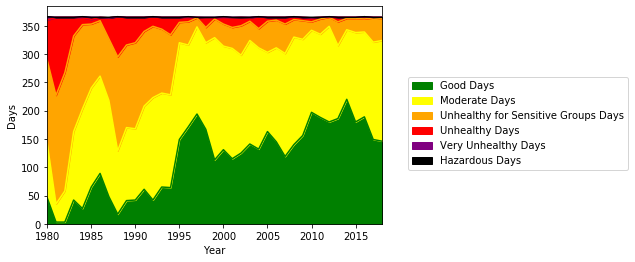

In [7]:
import matplotlib.pyplot as plt

fig = df_AQI.plot.area(x='Year', color = ['green', 'yellow','orange', 'red', 'purple', 'black']) #defining colors to match AQI categories
fig.legend(loc ='upper right',frameon=True, bbox_to_anchor=(1.75, 0.7))
plt.ylabel('Days')
#plt.savefig(r'C:\Users\Pat\Desktop\Patrick-DeBiasse.github.io\assets\images\SLC_Air_Quality\rating_by_year.png', bbox_inches='tight', dpi=300)

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/rating_by_year.png" alt="Plot of AQI by year from 1980 to 2018">

</center>

<p style="text-align: center; font-style: italic;"> Plot of SLC's Daily AQI from 1980 to 2018. </p>

From 1980 to 2018, there has been a fairly dramatic shift towards improved air quality, as signified by an increase in "Good" and "Moderate" days and a decrease in "Unhealthy" ones. 1982 would have been an especially good year to hold your breath. 

That said, there does seem to be a decrease in the number of "Good" air quality days in recent years. Looking specifically at that portion of the graph, things become more clear: 

Text(0, 0.5, 'Days')

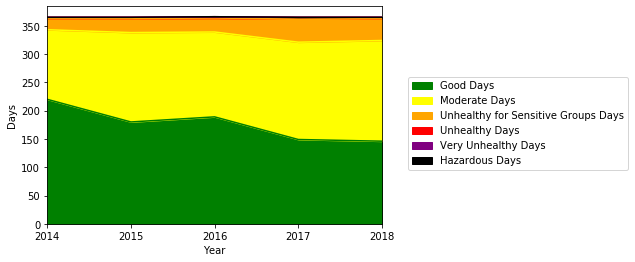

In [8]:
df_AQI_recent = df_AQI[df_AQI.Year > 2013]

fig = df_AQI_recent.plot.area(x='Year', color = ['green', 'yellow','orange', 'red', 'purple', 'black'])
fig.legend(loc ='upper right',frameon=True, bbox_to_anchor=(1.75, 0.7))
plt.xticks([2014, 2015, 2016, 2017, 2018])
plt.ylabel('Days')
#plt.savefig(r'C:\Users\Pat\Desktop\Patrick-DeBiasse.github.io\assets\images\SLC_Air_Quality\recent_AQI_2.png', bbox_inches='tight', dpi = 300)

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/recent_AQI_2.png" alt="Plot of AQI by year from 2014 to 2018">

</center>

<p style="text-align: center; font-style: italic;"> Plot of SLC's Daily AQI from 2014 to 2018. </p>

Since 2014, Salt Lake City has seen a decrease in "Good" air quality days. In their place are more "Moderate"
and "Unhealthy for Sensitive Groups" days. This negative trend is further evidenced by plotting median AQI per year:

Text(0, 0.5, 'Median AQI')

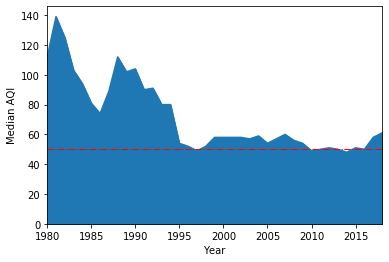

In [9]:
fig = df_median_AQI.plot.area(x='Year', stacked=True, legend = False)
plt.axhline(y=50, linewidth=1, linestyle='-.', color='r')
plt.ylabel('Median AQI')
#plt.savefig(r'C:\Users\Pat\Desktop\Patrick-DeBiasse.github.io\assets\images\SLC_Air_Quality\median_AQI.png', bbox_inches='tight', dpi=300)

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/median_AQI.png" alt="Plot of median AQI per year from 1980 to 2018">

</center>

<p style="text-align: center; font-style: italic;"> Plot of SLC's Median AQI per year from 1980 to 2018. </p>

The reference line is drawn at AQI=50. You might recall, an AQI below 50 signifies "Good" air quality, while an AQI between 50 and 100 signifies "Moderate" air quality. Great progress was made from 1980 to 2000 in reducing median AQI, at which point progress stalled, then sadly reversed in recent years.

Which pollutants are contributing to the recent increase in median AQI? 

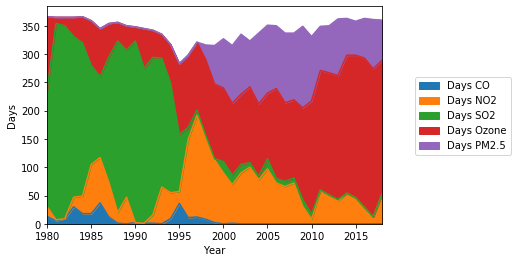

In [10]:
fig = df_pollutant.plot.area(x='Year', stacked=True)
fig.legend(loc ='upper right',frameon=True, bbox_to_anchor=(1.4, 0.7))
plt.ylabel('Days')
#plt.savefig(r'C:\Users\Pat\Desktop\Patrick-DeBiasse.github.io\assets\images\SLC_Air_Quality\pollutant_mix.png', bbox_inches='tight', dpi=300)

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/pollutant_mix.png" alt="Plot of largest AQI pollutant per year from 1980 to 2018">

</center>

<p style="text-align: center; font-style: italic;"> Plot of highest AQI pollutant per day from 1980 to 2018. </p>

The plot above shows which pollutant is the primary contributor to poor air quality per day (which of the five has the highest AQI), from 1980 to 2018. 

Sulfur dioxide was the dominant pollutant from 1980 to 1995, at which point it was dramatically reduced. In its place ozone (more commonly known as smog) has surged. Today ozone is the largest contributor to poor air quality in the valley. PM2.5 has also had a concerning rise since 2000. 

Having identified these two pollutants, I had some questions: 
 - What causes ozone and PM2.5 pollution? 
 - How harmful are they? 
 - Why are they increasing? 
 - How can we reduce air pollution in the valley?
 
 **Discussion**:

Ozone is caused by a reaction of chemical precursors (predominantly those emitted during the combustion of fossil fuels) and UV rays from sunlight:

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/ozone_formation.jpg" alt="Graphic of NOX and VOC forming ozone pollution.">

</center>

<p style="text-align: center; font-style: italic;"> Graphic detailing how ozone forms (source: EPA). </p>

PM2.5 (particulate pollution measuring less than 2.5 micrometers in diameter) comes from a variety of sources, including: the aforementioned precursors VOC and NOX (from fossil fuel combustion), burning wood, dust, pollen, and soot. Estimates from a 2014 study performed by the Utah Division of Air Quality clear things up a bit, identifying three main sources of PM2.5:  

<center>

<img src="{{ site.url }}{{ site.baseurl }}/assets/images/SLC_Air_Quality/pm2.5.png" alt="Pie chart of sources of pm2.5 pollution in SLC.">

</center>

<p style="text-align: center; font-style: italic;"> Sources of PM2.5 in Salt Lake, Davis, and Weber Counties (source: UDAQ, 2014 study). </p>

 - Point sources are large industrial or commercial facilities that emit more than 100 tons per year of a regulated pollutant.
 - Mobile sources are vehicles, trains, aircraft, boats, and so on. 
 - Area sources are space heating of structures, smoke from wood burning, dust from roadways, and emissions from restaurants, dry cleaners, printing/graphics, and auto body shops.
 
 As you can see, ozone and PM2.5 share the same largest cause - the combustion of fossil fuels. This is convenient in that we could reduce both pollutants through the same actions.  

That said, is our air quality currently "good enough"? What kind of health issues do these pollutants actually cause to those living in Salt Lake?  

An "expert assessment" performed by a group of researchers at BYU compiled research from 21 experts across medicine, public health, atmospheric science, and economics to understand the costs of air pollution in Utah. Their #1 key finding was:

*"Air pollution shortens the life of the average Utahn by 2 (1.1 to 3.5) years. This loss of life is distributed across most of the population rather than only affecting "sensitive groups." For example, 75% of Utahns lose 1 year of life or more because of air pollution and 23% lose 5 years or more. These estimates are directly in line with medical studies of the health effects of exposure to air pollution."*

The study goes on to identify the primary cause of air pollution in Salt Lake City:

*"85% of the pollutants causing health and economic harm are fossil fuel combustion products (fine particulate matter, ozone, and various oxides)."*

If you're curious, read more of the study's findings [here](https://pws.byu.edu/ben-abbott-lab/human-health-and-economic-costs-of-air-pollution-in-utah).

Knowing that air pollution is genuinely harmful to our health, and that 85% of it is caused by fossil fuel combustion, how can we go about reducing fossil fuel combustion in the valley? While carpooling and improving the efficiency of our homes would help, transitioning to electric vehicles for our transportation needs and renewable energy sources to power our homes and industries would be a much more direct route to meaningfully improving Salt Lake City's air quality. With air quality on a negative trend for the past few years, and an appreciation of the associated health effects, I think more aggressive action isn't unwarranted.

I'm not alone - here's another finding from the BYU study: 

*"Utahns ranked air quality as the 3rd most important issue in the state, after only water and education, and 80% of Utahns said they would accept additional taxes and legislation to improve air quality."*

With such support from the public, I hope Utah will accelerate the adoption of electric vehicles and implementation of renewable energy sources. The government could take the lead on this by electrifying their fleet vehicles where applicable. This happens to be the #2 recommendation made by a 37-person Technical Advisory Committee tasked with informing Utah's legislature on how best to improve our air quality. Check out all 7 recommendations made by the committee [here](https://gardner.utah.edu/wp-content/uploads/Utah-Roadmap-Public-Draft.pdf).

**Conclusion**:

Despite great progress from 1980 to 1995, air quality in Salt lake City has become worse in recent years. The pollutants most responsible for this alarming trend are ozone (smog) and PM2.5 (particulate pollution). Both of these pollutants are caused in large part by the combustion of fossil fuels within the valley's transportation and residential/commercial energy needs. Accelerating the adoption of electric vehicles and renewable energy sources is the most direct route to improving air quality in Salt Lake City.

**Future work**:

The original dataframe I made for this post contains AQI data for all counties across the U.S. from 1980 to 2018. In order to make air quality data accessible for more people, I'd like to make an interactive plot using bokeh or plotly that would allow users to select their own state and county in order to get direct access to the plots I found useful in assessing Salt Lake City's air quality. This could help communities diagnose the quality of their air at an AQI level, then look specifically at which primary sources of pollution are at fault, thus better informing their efforts at improving their air. 

In addition, through this work I found I really knew very little about how air quality is measured, communicated, and how harmful polluted air can be. Placing more visible air quality monitors downtown in high foot traffic areas that display live readouts of air quality and pollutant mix could help educate others and further increase public awareness of the issue, potentially accelerating political action.  

**References**:

Brigham Young University - College Undergraduate Research Awards Program (2020) "Human health and economic costs of air pollution in Utah". Online [here](https://brightspotcdn.byu.edu/96/f4/8817094748fd8ac1edc5288bf804/costs-of-air-pollution-byu-1-1.pdf).

University of Utah Center for High Performing Computing (2017) - "Frequently asked Questions about Wintertime PM2.5 Pollution in Utah's Salt Lake Valley". Online [here](http://home.chpc.utah.edu/~whiteman/PM2.5/PM2.5.html).

Hannah Ritchie and Max Roser (2020) - "Outdoor Air Pollution". Online at OurWorldInData.org [here](https://ourworldindata.org/outdoor-air-pollution).

WHO (2018) – Fact sheet – Ambient air quality and health. Updated May 2018. Online [here](https://ourworldindata.org/outdoor-air-pollution).

NASA (2010) - "New Map Offers a Global View of Health-Sapping Air Pollution". Published Sep 2010. Online [here](https://www.nasa.gov/topics/earth/features/health-sapping.html).

EPA (2018) - "Technical Assistance Document for the
Reporting of Daily Air Quality – the Air Quality
Index (AQI)". Updated Sep 2018. Online [here](https://www3.epa.gov/airnow/aqi-technical-assistance-document-sept2018.pdf).

EPA (2017) - "Air Quality Index - A Guide to Air Quality and Your Health". Updated Jul 2017. Online [here](https://airnow.gov/index.cfm?action=aqi_brochure.index).

Wikipedia (2020) - "Air quality index". Updated Feb 2020. Online [here](https://en.wikipedia.org/wiki/Air_quality_index#Computation).

Utah DEQ (2020) - "What is Ozone?". Updated Feb 2020. Online [here](https://deq.utah.gov/air-quality/what-is-ozone).

Utah DEQ (2019) - "Particulate Matter Overview". Updated Jun 2019. Online [here](https://deq.utah.gov/air-quality/particulate-matter-overview).